In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [150]:
df=pd.read_csv("raceDetails.csv")

In [151]:
df

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,best_rating
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,1.24.50
1,2024-01-01,Bursa,2,Maiden,Undefined,4 Years Old,Arabian,1400,Dirt,Good Going,1.33.63
2,2024-01-01,Bursa,3,Condition 3,Female,3 Years Old,English,1200,Dirt,Good Going,1.11.37
3,2024-01-01,Bursa,4,Condition 4,Undefined,4 Years Old and Up,Arabian,2000,Dirt,Good Going,2.18.40
4,2024-01-01,Bursa,5,Handicap 15,Undefined,4 Years Old and Up,English,1300,Dirt,Good Going,1.18.11
...,...,...,...,...,...,...,...,...,...,...,...
475,2024-01-31,Şanlıurfa,4,Handicap 15,Undefined,4 Years Old and Up,English,2100,Dirt,Good Going,2.13.86
476,2024-01-31,Şanlıurfa,5,Condition 2,Female,4 Years Old,Arabian,1400,Dirt,Good Going,1.35.56
477,2024-01-31,Şanlıurfa,6,Maiden,Undefined,3 Years Old,English,1300,Dirt,Good Going,1.19.29
478,2024-01-31,Şanlıurfa,7,Condition 3,Undefined,4 Years Old and Up,English,1300,Dirt,Good Going,1.19.29


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   race_date             480 non-null    object
 1   race_city             480 non-null    object
 2   race_no               480 non-null    int64 
 3   race_type             480 non-null    object
 4   race_sex_group        480 non-null    object
 5   race_age_group        480 non-null    object
 6   race_race_group       480 non-null    object
 7   race_length           480 non-null    int64 
 8   race_track_type       480 non-null    object
 9   race_track_condition  480 non-null    object
 10  best_rating           480 non-null    object
dtypes: int64(2), object(9)
memory usage: 41.4+ KB


In [153]:
df.isnull().sum()

race_date               0
race_city               0
race_no                 0
race_type               0
race_sex_group          0
race_age_group          0
race_race_group         0
race_length             0
race_track_type         0
race_track_condition    0
best_rating             0
dtype: int64

In [154]:
df['rating_rank'] = df.groupby(['race_city', 'race_date'])['best_rating'].rank(ascending=True, method='min')

In [155]:
df["race_track_type"].unique()

array(['Dirt', 'Dirt (Polytrack)'], dtype=object)

In [156]:
df["race_race_group"].unique()

array(['English', 'Arabian'], dtype=object)

In [157]:
df["race_sex_group"].unique()

array(['Undefined', 'Female'], dtype=object)

In [158]:
df = pd.get_dummies(df, columns=['race_track_type','race_race_group','race_sex_group'],drop_first=True)

In [159]:
np.random.seed(42)

In [160]:
df

,race_date,race_city,race_no,race_type,race_age_group,race_length,race_track_condition,best_rating,rating_rank,race_track_type_Dirt (Polytrack),race_race_group_English,race_sex_group_Undefined
0,2024-01-01,Bursa,1,Condition 2,3 Years Old,1400,Good Going,1.24.50,4.0,0,1,1
1,2024-01-01,Bursa,2,Maiden,4 Years Old,1400,Good Going,1.33.63,6.0,0,0,1
2,2024-01-01,Bursa,3,Condition 3,3 Years Old,1200,Good Going,1.11.37,1.0,0,1,0
3,2024-01-01,Bursa,4,Condition 4,4 Years Old and Up,2000,Good Going,2.18.40,9.0,0,0,1
4,2024-01-01,Bursa,5,Handicap 15,4 Years Old and Up,1300,Good Going,1.18.11,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,2024-01-31,Şanlıurfa,4,Handicap 15,4 Years Old and Up,2100,Good Going,2.13.86,7.0,0,1,1
476,2024-01-31,Şanlıurfa,5,Condition 2,4 Years Old,1400,Good Going,1.35.56,4.0,0,0,0
477,2024-01-31,Şanlıurfa,6,Maiden,3 Years Old,1300,Good Going,1.19.29,1.0,0,1,1
478,2024-01-31,Şanlıurfa,7,Condition 3,4 Years Old and Up,1300,Good Going,1.19.29,1.0,0,1,1


In [161]:
df["race_date"].unique()

array(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
       '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
       '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
       '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
       '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
       '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
       '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
       '2024-01-29', '2024-01-30', '2024-01-31'], dtype=object)

In [162]:
df["race_city"].unique()

array(['Bursa', 'Adana', 'Antalya', 'İstanbul', 'İzmir', 'Kocaeli',
       'Şanlıurfa'], dtype=object)

In [163]:
df["race_type"].unique()

array(['Condition 2', 'Maiden', 'Condition 3', 'Condition 4',
       'Handicap 15', 'Condition-6', 'Handicap 14', 'Condition 5',
       'Handicap 21', 'Handicap 13', 'Handicap 17', 'Handicap 16',
       'Sale 1', 'Condition-8', 'G 3', 'Condition-9', 'Condition 1',
       'Sale 3', 'Sale 2', 'Condition-7'], dtype=object)

In [164]:
df["race_track_condition"].unique()

array(['Good Going', 'Muddy', 'Moist', 'Wet'], dtype=object)

In [165]:
le=LabelEncoder()
le.fit(df["race_date"])
df["race_date"]=le.transform(df["race_date"])

In [166]:
le.fit(df["race_city"])
df["race_city"]=le.transform(df["race_city"])

In [167]:
le.fit(df["race_type"])
df["race_type"]=le.transform(df["race_type"])

In [168]:
le.fit(df["race_track_condition"])
df["race_track_condition"]=le.transform(df["race_track_condition"])

In [169]:
le.fit(df["race_age_group"])
df["race_age_group"]=le.transform(df["race_age_group"])

In [170]:
df

,race_date,race_city,race_no,race_type,race_age_group,race_length,race_track_condition,best_rating,rating_rank,race_track_type_Dirt (Polytrack),race_race_group_English,race_sex_group_Undefined
0,0,2,1,1,0,1400,0,1.24.50,4.0,0,1,1
1,0,2,2,16,1,1400,0,1.33.63,6.0,0,0,1
2,0,2,3,2,0,1200,0,1.11.37,1.0,0,1,0
3,0,2,4,3,2,2000,0,2.18.40,9.0,0,0,1
4,0,2,5,12,2,1300,0,1.18.11,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,30,6,4,12,2,2100,0,2.13.86,7.0,0,1,1
476,30,6,5,1,1,1400,0,1.35.56,4.0,0,0,0
477,30,6,6,16,0,1300,0,1.19.29,1.0,0,1,1
478,30,6,7,2,2,1300,0,1.19.29,1.0,0,1,1


In [171]:
df=df.drop(columns=["race_no","best_rating"])

In [172]:
df.head(10)

,race_date,race_city,race_type,race_age_group,race_length,race_track_condition,rating_rank,race_track_type_Dirt (Polytrack),race_race_group_English,race_sex_group_Undefined
0,0,2,1,0,1400,0,4.0,0,1,1
1,0,2,16,1,1400,0,6.0,0,0,1
2,0,2,2,0,1200,0,1.0,0,1,0
3,0,2,3,2,2000,0,9.0,0,0,1
4,0,2,12,2,1300,0,2.0,0,1,1
5,0,2,2,2,1400,0,4.0,0,1,1
6,0,2,16,1,1400,0,6.0,0,0,1
7,0,2,5,2,1300,0,2.0,0,1,0
8,0,2,11,2,1800,0,8.0,0,0,0
9,1,0,4,1,1400,0,4.0,0,0,0


In [173]:
df['target'] = (df['rating_rank'] <= 3).astype(int)  # İlk üçte bitirme

In [174]:
df


,race_date,race_city,race_type,race_age_group,race_length,race_track_condition,rating_rank,race_track_type_Dirt (Polytrack),race_race_group_English,race_sex_group_Undefined,target
0,0,2,1,0,1400,0,4.0,0,1,1,0
1,0,2,16,1,1400,0,6.0,0,0,1,0
2,0,2,2,0,1200,0,1.0,0,1,0,1
3,0,2,3,2,2000,0,9.0,0,0,1,0
4,0,2,12,2,1300,0,2.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
475,30,6,12,2,2100,0,7.0,0,1,1,0
476,30,6,1,1,1400,0,4.0,0,0,0,0
477,30,6,16,0,1300,0,1.0,0,1,1,1
478,30,6,2,2,1300,0,1.0,0,1,1,1


In [175]:
x = df.drop(['rating_rank', 'target'], axis=1)
y = df['target']

In [176]:
x

,race_date,race_city,race_type,race_age_group,race_length,race_track_condition,race_track_type_Dirt (Polytrack),race_race_group_English,race_sex_group_Undefined
0,0,2,1,0,1400,0,0,1,1
1,0,2,16,1,1400,0,0,0,1
2,0,2,2,0,1200,0,0,1,0
3,0,2,3,2,2000,0,0,0,1
4,0,2,12,2,1300,0,0,1,1
...,...,...,...,...,...,...,...,...,...
475,30,6,12,2,2100,0,0,1,1
476,30,6,1,1,1400,0,0,0,0
477,30,6,16,0,1300,0,0,1,1
478,30,6,2,2,1300,0,0,1,1


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   race_date                         480 non-null    int32  
 1   race_city                         480 non-null    int32  
 2   race_type                         480 non-null    int32  
 3   race_age_group                    480 non-null    int32  
 4   race_length                       480 non-null    int64  
 5   race_track_condition              480 non-null    int32  
 6   rating_rank                       480 non-null    float64
 7   race_track_type_Dirt (Polytrack)  480 non-null    uint8  
 8   race_race_group_English           480 non-null    uint8  
 9   race_sex_group_Undefined          480 non-null    uint8  
 10  target                            480 non-null    int32  
dtypes: float64(1), int32(6), int64(1), uint8(3)
memory usage: 20.3 KB


In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=22,train_size=0.80)

In [179]:
ss=StandardScaler()
x_train =ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [180]:
xgb = XGBClassifier(reg_lambda=1, reg_alpha=0.5)
model1 = xgb.fit(x_train, y_train)
model1.score(x_test,y_test)

0.8645833333333334

In [181]:
from sklearn.metrics import accuracy_score, classification_report
predictions = model1.predict(x_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8645833333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        58
           1       0.80      0.87      0.84        38

    accuracy                           0.86        96
   macro avg       0.86      0.87      0.86        96
weighted avg       0.87      0.86      0.87        96



In [144]:
rf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=10, min_samples_leaf=7)
model2 = rf.fit(x_train, y_train)
model2.score(x_test,y_test)

0.875

In [145]:
predictions = model2.predict(x_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.875

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        58
           1       0.78      0.95      0.86        38

    accuracy                           0.88        96
   macro avg       0.87      0.89      0.87        96
weighted avg       0.89      0.88      0.88        96



In [146]:
print("XGB Classifier Training Accuracy:", model1.score(x_train , y_train))
print("XGB Classifier Testing Accuracy:", model1.score(x_test , y_test))

XGB Classifier Training Accuracy: 1.0
XGB Classifier Testing Accuracy: 0.8645833333333334


In [147]:
print("Random Forest Training Accuracy:", model2.score(x_train , y_train))
print("Random Forest Testing Accuracy:", model2.score(x_test , y_test))

Random Forest Training Accuracy: 0.90625
Random Forest Testing Accuracy: 0.875


In [148]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb, x_train, y_train, cv=4)
print("XGBoost Cross-Validation Accuracy:", cv_scores.mean())

XGBoost Cross-Validation Accuracy: 0.8567708333333334


C:\Users\MERAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


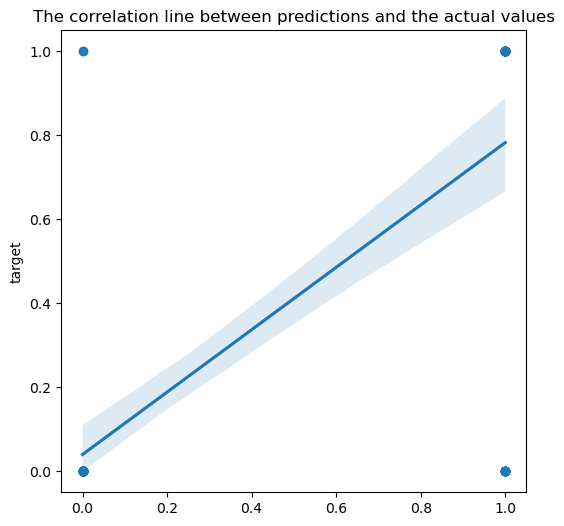

In [191]:
y_pred = model2.predict(x_test)
plt.figure(figsize=(6,6))
sns.regplot(y_pred, y_test)
plt.title("The correlation line between predictions and the actual values")
plt.show()